## Springboard Data Science Capstone 1 Data Exploration

In this project, i'll be looking at the data from the 500 cities local data for better health file.

In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

%matplotlib inline

In [2]:
# Read Data in pandas data frame and show info of data
df = pd.read_csv('../rawData/500_Cities__Local_Data_for_Better_Health__2017_release.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 24 columns):
Year                          810103 non-null int64
StateAbbr                     810103 non-null object
StateDesc                     810103 non-null object
CityName                      810047 non-null object
GeographicLevel               810103 non-null object
DataSource                    810103 non-null object
Category                      810103 non-null object
UniqueID                      810103 non-null object
Measure                       810103 non-null object
Data_Value_Unit               810103 non-null object
DataValueTypeID               810103 non-null object
Data_Value_Type               810103 non-null object
Data_Value                    789432 non-null float64
Low_Confidence_Limit          789432 non-null float64
High_Confidence_Limit         789432 non-null float64
Data_Value_Footnote_Symbol    20671 non-null object
Data_Value_Footnote           20671 non-

In [20]:
df['Short_Question_Text']

0                                 Health Insurance
1                                 Health Insurance
2                                        Arthritis
3                                        Arthritis
4                                   Binge Drinking
5                                   Binge Drinking
6                              High Blood Pressure
7                              High Blood Pressure
8                             Taking BP Medication
9                             Taking BP Medication
10                            Cancer (except skin)
11                            Cancer (except skin)
12                                  Current Asthma
13                                  Current Asthma
14                          Coronary Heart Disease
15                          Coronary Heart Disease
16                                  Annual Checkup
17                                  Annual Checkup
18                           Cholesterol Screening
19                           Ch

In [4]:
# Pivot table on cities & multi index categories & short question text (short for measure). average on Data Value. 
category = df['Category'] == 'Health Outcomes'
dfPiv = df.pivot_table(index='CityName',columns=['Category','Short_Question_Text'],values='Data_Value',aggfunc=np.mean)

#Create zscore for all columns to standardize data
dfPivZscore = dfPiv.apply(zscore)

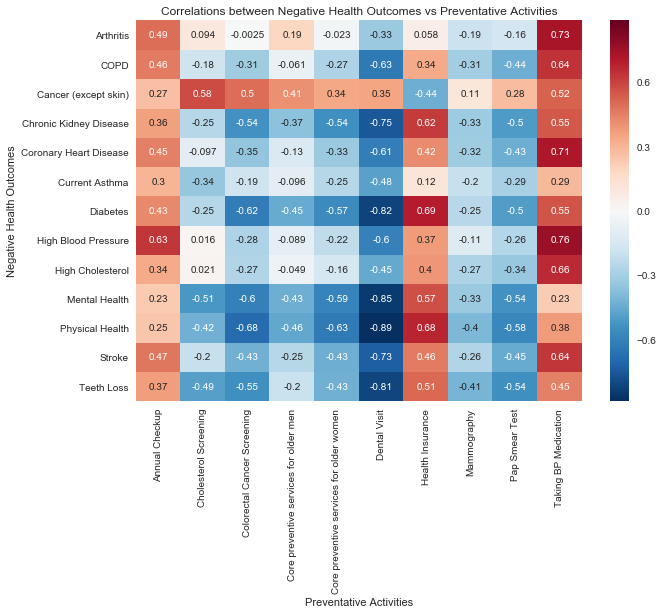

In [5]:
#Plot Heatmap of correlations between preventative activites and health outcomes

fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(dfPivZscore.corr().loc['Health Outcomes','Prevention'],annot=True)
#plt.setp(ax.ax_heatmap.get_yticklabels(), rotation=0);
plt.title('Correlations between Negative Health Outcomes vs Preventative Activities')
plt.ylabel('Negative Health Outcomes')
plt.xlabel('Preventative Activities')

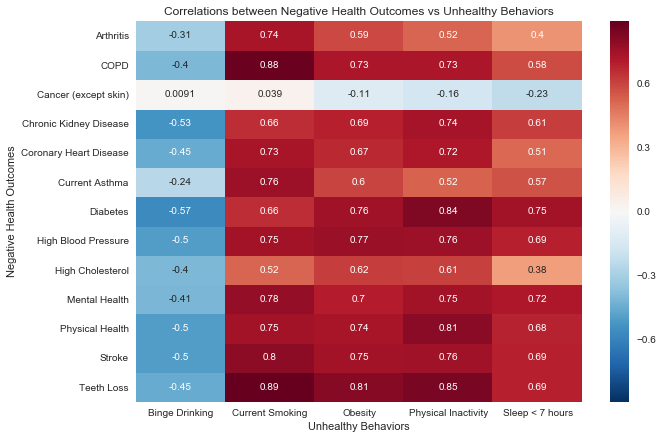

In [6]:
#Plot Heatmap of correlations between unhealthy behaviors  and health outcomes

fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(dfPivZscore.corr().loc['Health Outcomes','Unhealthy Behaviors'],annot=True)
#plt.setp(ax.ax_heatmap.get_yticklabels(), rotation=0);
plt.title('Correlations between Negative Health Outcomes vs Unhealthy Behaviors')
plt.ylabel('Negative Health Outcomes')
plt.xlabel('Unhealthy Behaviors')